In [ ]:
library(maps)
library(twitteR)
library(ggplot2)

setup_twitter_oauth("5ndsbG499KP0FSwGY2TaXNiY4","8fWPeag5VMvsYhZPbHlsmfSv4pPOWf55q02nP4KZzXab2IiaPY","963164643178041344-t4vaKS5WQklpiTnUXheWgj9kHQNnFgF","tlda58OfHg9XKoJWDhD5xV7iavQqIMgpbWFpomHNxOicZ")

us<-map_data("state")
tweets1<-searchTwitter("#flu",n=5000)
tweet.df<-twListToDF(tweets1)
userNames<-tweet.df$screenName
usersDF<-twListToDF(lookupUsers(userNames))
knownUsersDF<-subset(usersDF,grepl('^[A-Za-z, ]+$', usersDF$location))
locations<-knownUsersDF$location
ll.visited <- geocode(locations)
cities<-strsplit(locations,",")
usCities<-c()
for(i in 1:length(cities)){
  city<-cities[[i]][1]
  if(TRUE %in% grepl(city,us.cities$name)){
    usCities<-c(usCities,city)
  }
}
fluVictimsCnt<-c()
for(i in 1:50){
  fluVictimsCnt<-c(fluVictimsCnt,1)
}
for(i in 1:length(usCities)){
  indexes=grep(usCities[i],us.cities$name)
  if(length(indexes)>0){
    index=grep(us.cities$country.etc[indexes[1]],state.abb)
    fluVictimsCnt[index]<-fluVictimsCnt[index]+1
  }
}
#fluTwitterdf=data.frame(state.name,fluVictimsCnt)
#write.csv(fluTwitterdf,file="filteredTwitterData.csv")
fluTwitterdf<-read.csv("filteredTwitterData.csv")
df<-fluTwitterdf
df["region"]<-tolower(state.name)
#arr <- fluTwitterdf %>% add_rownames("region") %>% mutate(region=tolower(state.name))
ILIActivityLevel<-as.vector(fluTwitterdf$fluVictimsCnt)
gg <- ggplot()
gg <- gg + geom_map(data=us, map=us, aes(x=long, y=lat, map_id=region), fill="black", color="black", size=0.15)
gg <- gg + geom_map(data=df, map=us, aes(fill=ILIActivityLevel, map_id=region),color="black", size=0.15)
gg <- gg + labs(x=NULL, y=NULL)
gg <- gg + coord_map("albers", lat0 = 39, lat1 = 45) 
gg <- gg + theme(panel.border = element_blank())
gg <- gg + theme(panel.background = element_blank())
gg <- gg + theme(axis.ticks = element_blank())
gg <- gg + theme(axis.text = element_blank())
gg

Warning message:
"Ignoring unknown aesthetics: x, y"

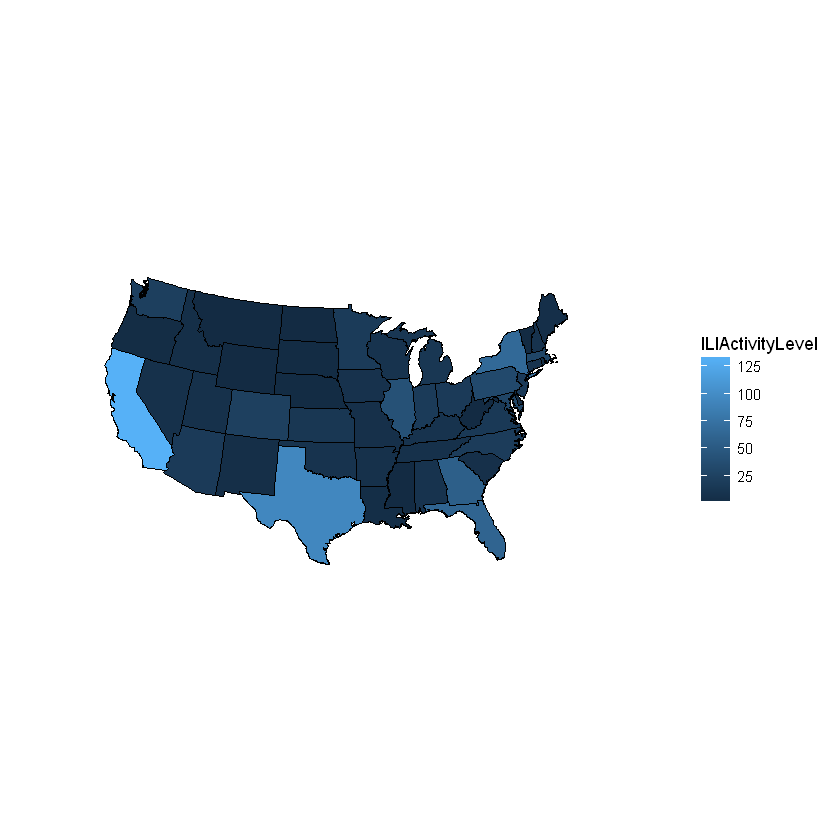

In [6]:
us<-map_data("state")
fluTwitterdf<-read.csv("filteredTwitterData.csv")
df<-fluTwitterdf
df["region"]<-tolower(state.name)
#arr <- fluTwitterdf %>% add_rownames("region") %>% mutate(region=tolower(state.name))
ILIActivityLevel<-as.vector(fluTwitterdf$fluVictimsCnt)
gg <- ggplot()
gg <- gg + geom_map(data=us, map=us, aes(x=long, y=lat, map_id=region), fill="black",             color="black", size=0.15)
gg <- gg + geom_map(data=df, map=us, aes(fill=ILIActivityLevel, map_id=region),color="black", size=0.15)
gg <- gg + labs(x=NULL, y=NULL)
gg <- gg + coord_map("albers", lat0 = 39, lat1 = 45) 
gg <- gg + theme(panel.border = element_blank())
gg <- gg + theme(panel.background = element_blank())
gg <- gg + theme(axis.ticks = element_blank())
gg <- gg + theme(axis.text = element_blank())
gg